# 18.06 Pset 1 Solutions

## Problem 1 (15 points)

Suppose $A$ is a $3 \times 3$ matrix, $B$ is a $2 \times 3$ matrix, $x$ is a 3-component column vector, and $y$ is a $2$-component column vector.

What is the **shape** of the output (e.g. scalar, $4\times 3$ matrix, 5-component column vector, etcetera) of the following operations, or say **nonsense** if the operation doesn't make sense.

1. $A B$
2. $B A$
3. $A B y$
4. $B A x$
5. $y^T A x$
6. $y^T B x$
7. $x^T y$
8. $y x^T$
9. $yx$
10. $A^2 = AA$
11. $B^2 = BB$
12. $\frac{x}{A}$
13. $\frac{x}{x}$
14. $\frac{x}{3}$
15. $\frac{B}{3}$

### Solution

Recall that we can take tha matrix product $AB$ only if the number of columns of $A$ is equal to the number of rows of $B$. Similarly, for a column-vector $Ax$ we requre that the number of columns of $A$ is equal to the number of components of $x$ (it is helpful to interpret an $n$-component column-vector as an $1\times n$ matrix here). Note that the division oparations by a matrix $\frac{x}{A}$ or by a column-vector $\frac{x}{y}$ are nonsence.

1. __nonsense__
2. $2\times 3$ matrix
3. __nonsense__ 
4. $2$-component vector (could also be loosely viewed as a "$2\times 1$ matrix") 
5. __nonsense__
6. Scalar, but could also be loosely viewed as a "$1\times 1$ matrix" or "$1$-component column vector" because of the ambiguity between a row vector $y^T$ and a 1-row matrix, or a column vector $x$ and a 1-column matrix.   Any of these is acceptable here, but in practice we recognize from context in linear algebra that $y^T$ is a kind of "dot-product operator" whose result is interpreted as a scalar.  (This is tricky in computer languages, see [this talk](https://www.youtube.com/watch?v=C2RO34b_oPM).)
7. __nonsense__
8. $2\times 3$ matrix
9. __nonsense__
10. $3\times 3$ matrix
11. __nonsense__
12. __nonsense__
13. __nonsense__
14. $3$-component vector (could also be loosely viewed as a "$3\times 1$ matrix") 
15. $2\times 3$ matrix


## Problem 2 (3+3+3+3+3 points)

Given a function $f(x)$, we can *sample* it at $n$ equally spaced points $x_1 = a, x_2 = a+\Delta x, x_3 = a+2\Delta x, \ldots, x_n = a+(n-1)\Delta x = b$ from $a$ to $b$ to obtain a column vector
$$
\vec{f} = \begin{pmatrix} f(x_1) \\ f(x_2) \\ \vdots \\ f(x_n) \end{pmatrix} = \begin{pmatrix} f_1 \\ f_2 \\ \vdots \\ f_n \end{pmatrix} \, ,
$$
where $f_k = f(x_k) = f(a + (k-1)\Delta x)$.

**(a)** An *approximate derivative* of $f(x)$ (called a [finite-difference approximation](https://en.wikipedia.org/wiki/Finite_difference)) is given by the *difference* operation:
$$
D\vec{f} = \frac{1}{\Delta x} \begin{pmatrix} f_2 - f_1 \\ f_3 - f_2 \\ \vdots \\ f_n - f_{n-1} \end{pmatrix}
$$
Write down this linear operator $D$ as a matrix (what size?) for $n=5$.

**(b)** Construct the *same* $D$ matrix in Julia, for $\Delta x = 1$, using the [`diagm` function](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.diagm) to build matrices out of diagonal entries, and the [`fill` function](https://docs.julialang.org/en/v1/base/arrays/#Base.fill) to make vectors filled with constants.  For example, this is a $6 \times 8$ matrix with 1's, 4's, and 7's on three diagonals:

In [ ]:
using LinearAlgebra
diagm(6,8, 0 => fill(1,6), 1 => fill(4,6), -2 => fill(7,4))

In [ ]:
D = ??? # FILL IN YOUR CODE HERE

**(c)** Use your same code to construct a $D$ matrix for $n=100$ and apply it to approximately differentate $f(x) = \sin(x)$ for $a,b = 0,5$, and plot your result using the code below.  It should look like a cosine!

In [ ]:
a, b = 0, 5
n = 100
Δx = (b - a) / (n - 1) # spacing for n points from a to b

x = range(a, b, length=n) # array of n points from a to b
f = sin.(x) # apply sin(x) elementwise to the vector x

D = ??? # FILL IN YOUR CODE HERE

# plot f and D*f
using PyPlot
plot(x, f, "r-")
plot(x[1:end-1] .+ Δx/2, D*f, "b-")

title(L"$f(x) = \sin(x)$ and approximate derivative")
xlabel(L"x")
legend([L"f(x)", L"df/dx"])

**(d)** An *approximate integral* of a function $g(x)$ sampled at $m$ points with spacing $\Delta x$ is given by a *sum*:
$$
S \vec{g} = S \underbrace{\begin{pmatrix} g_1 \\ g_2 \\ \vdots \\ g_m \end{pmatrix}}_\vec{g} = (g_1 + g_2 + \cdots g_m) \Delta x \, ,
$$
where $g_k = g(x_k)$ similar to $\vec{f}$.  Write the linear operator $S$ as a matrix for $m=6$.

**(e)** What is the product $S D$ for $n=6$ and $m = \_\_\_\_$ (for the same $\Delta x$)?  (That is, the approximate "integral of the derivative" is what linear operator?)

### Solution

__(a)__ For $n=5$ the operator $D$ sends the $5$-component vector $[f_1, f_2, f_3, f_4, f_5]$ to the $4$-component vector $[\frac{f_2-f_1}{\Delta x}, \frac{f_3-f_2}{\Delta x}, \frac{f_4-f_3}{\Delta x}, \frac{f_5-f_4}{\Delta x}]$. This corresponds to the following $4\times 5$ matrix:
$$
\boxed{D=\begin{pmatrix} -\frac{1}{\Delta x} & \frac{1}{\Delta x} & 0 & 0 & 0\\ 0 & -\frac{1}{\Delta x} & \frac{1}{\Delta x} & 0 & 0 \\ 0 & 0 & -\frac{1}{\Delta x} & \frac{1}{\Delta x} & 0 \\ 0 & 0 & 0 & -\frac{1}{\Delta x} & \frac{1}{\Delta x} \end{pmatrix}}
$$

__(b)__ Note that for $\Delta x = 1$ we have $-\frac{1}{\Delta x}$ on the "main" diagonal of $D$, $\frac{1}{\Delta x}$ one step above this diagonal, and $0$ entries elsewhere. So:

In [1]:
using LinearAlgebra
D = diagm(4, 5, 0 => fill(-1, 4), 1 => fill(1, 4))

4×5 Matrix{Int64}:
 -1   1   0   0  0
  0  -1   1   0  0
  0   0  -1   1  0
  0   0   0  -1  1

__(c)__

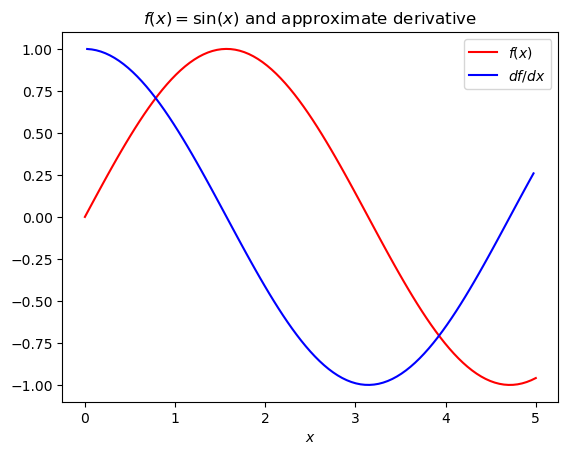

In [2]:
a, b = 0, 5
n = 100
Δx = (b - a) / (n - 1) # spacing for n points from a to b

x = range(a, b, length=n) # array of n points from a to b
f = sin.(x) # apply sin(x) elementwise to the vector x

D =  diagm(n-1, n, 0 => fill(-1/Δx, n-1), 1 => fill(1/Δx, n-1))

# plot f and D*f
using PyPlot
plot(x, f, "r-")
plot(x[1:end-1] .+ Δx/2, D*f, "b-")

title(L"$f(x) = \sin(x)$ and approximate derivative")
xlabel(L"x")
legend([L"f(x)", L"df/dx"]);

__(d)__ This is similar to $D$ in part __(a)__: we want to send the $6$-component vector $[g_1, \dots, g_6]$ to the "$1$-component vector" (interpreted as a scalar, in this context) $(g_1+\dots g_6)\Delta x$. The size of $S$ should be $1\times 6$ (a "row vector"), and the matrix is
$$
\boxed{S=\begin{pmatrix}\Delta x & \Delta x & \Delta x & \Delta x & \Delta x & \Delta x \end{pmatrix}}
$$

__(e)__ For $n=6$ the derivative $D$ outputs a $5$-component vector, while the input of $S$ is an $m$-component vector. So, $\boxed{m = 5}$. The product $SD$ is

$$
SD=\begin{pmatrix} \Delta x & \Delta x & \Delta x & \Delta x &\Delta x\end{pmatrix}\begin{pmatrix} -\frac{1}{\Delta x} & \frac{1}{\Delta x} & 0 & 0 & 0 & 0\\ 0 & -\frac{1}{\Delta x} & \frac{1}{\Delta x} & 0 & 0 & 0 \\ 0 & 0 & -\frac{1}{\Delta x} & \frac{1}{\Delta x} & 0 & 0 \\ 0 & 0 & 0 & -\frac{1}{\Delta x} & \frac{1}{\Delta x} & 0\\ 0 & 0 & 0 & 0 & -\frac{1}{\Delta x} & \frac{1}{\Delta x} \end{pmatrix}=\boxed{ \begin{pmatrix}-1 & 0 & 0 & 0 & 0 & 1 \end{pmatrix}}
$$

Note that this is analogous to a definite integral of a derivative: the result is the **operator that takes difference of the two endpoints**, just as $\int_a^b f'(x) dx = f(b) - f(a)$.

## Problem 3 (5+5 points)

$B$ is a given $n \times n$ matrix, $y$ is a given $n$-component vector, and $x$ is an unknown $n$-component vector satisfying the equations:
$$
B(x - y) = \frac{x+y}{2}
$$

**(a)** Give a matrix $A$ (in terms of $B$ and/or the $n\times n$ identity matrix $I$) and a vector $b$ (in terms of $y$ and/or $B$) such that $x$ is a solution to $Ax = b$.   (That is, we want to rewrite our equations in "standard" form so that we can exploit existing algorithms.  Re-arrange the equation above so that all the terms involving $x$ are on one side and all of the known vectors are on the other side.)

**(b)** In Julia, $Ax = b$ can be solved with `x = A \ b`.  Check that your $A$ and $b$ from part (a) are correct (satisfy the original equation) on a random $5\times 5$ problem.  (Note: Julia has a built-in constant [`I`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.I) that denotes a context-dependent identity matrix, e.g. `A + 2I` in Julia computes $A + 2I$.)

In [ ]:
B = randn(5,5) # a random 5×5 matrix
y = randn(5)   # a random 5-component vector

A = ???? # FILL IN YOUR CODE HERE from your answer in (a)
b = ???? # FILL IN YOUR CODE HERE from your answer in (a)

x = A \ b # solve Ax=b

# check: does B(x - y) equal (x+y)/2 , up to roundoff errors?

B*(x - y) ≈ (x + y)/2 # ≈ is equality up to roundoff … should return "true"

### Solution

__(a)__ As long as we are carefull about preserving the orders of multiplication, we can manipulate with matrix equations in the same way as with ordinary expressions (open brackets, move from one side to another, factor out a common factor). Then we have
$$
B(x-y)=\frac{x+y}{2}= \frac{I}{2} (x+y),
$$
which is equivalent to 
$$
\left(B-\frac{I}{2}\right)x=\left(B+\frac{I}{2}\right)y.
$$
So
$$
\boxed{\begin{gather} A=B-\frac{I}{2},\qquad b= \left(B+\frac{I}{2}\right)y
\end{gather}}
$$

__(b)__ 

In [3]:
B = randn(5,5) # a random 5×5 matrix
y = randn(5)   # a random 5-component vector

A = B - I/2
b = (B + I/2)*y

x = A \ b # solve Ax=b

# check: does B(x - y) equal (x+y)/2 , up to roundoff errors?

B*(x - y) ≈ (x + y)/2 # ≈ is equality up to roundoff … should return "true"

true

## Problem 4 (5+5 points)

(From Strang, section 2.2, problem 14.) Consider Gaussian elimination on the following system of equations:

\begin{align}
2x + 5y + z &= 0 \\
4x + dy + z &= 2 \\
y - z &= 3
\end{align}

(Write your solution in matrix form.)

* What number $d$ forces you to do a row exchange during elimination, and what (non-singular) triangular system do you obtain for that $d$?
* What value of $d$ would make this system singular (no third pivot, i.e. no way to get a triangular system with 3 nonzero values on the diagonal)?

### Solution

First, let's convert the system to matrix form:

$$
\begin{pmatrix}
2 & 5 & 1 \\ 4 & d & 1 \\ 0 & 1 & -1 
\end{pmatrix}
\begin{pmatrix}
x \\ y \\ z
\end{pmatrix}
=
\begin{pmatrix}
0\\2\\3
\end{pmatrix}.
$$

We start by performing Gaussian elimination. We start by subtracting the first row from the second with multipe $2$:

$$
\begin{pmatrix}
2 & 5 & 1 \\ 0 & d-10 & -1 \\ 0 & 1 & -1 
\end{pmatrix}
\begin{pmatrix}
x \\ y \\ z
\end{pmatrix}
=
\begin{pmatrix}
0\\2\\3
\end{pmatrix}.
$$


If $d-10\neq 0$, we can conclude the elimination, subtracting the second row from the third with multiple $\frac{1}{d-10}$:

$$
\begin{pmatrix}
2 & 5 & 1 \\ 0 & d-10 & -1 \\ 0 & 0 & -1+\frac{1}{d-10} 
\end{pmatrix}
\begin{pmatrix}
x \\ y \\ z
\end{pmatrix}
=
\begin{pmatrix}
0\\2\\3-\frac{2}{d-10}
\end{pmatrix}.
$$

Now we can answer the problem's questions:

* The standard elimination above does not only if $\boxed{d=10}$. In this case, the second step is
$$
\begin{pmatrix}
2 & 5 & 1 \\ 0 & 0 & -1 \\ 0 & 1 & -1 
\end{pmatrix}
\begin{pmatrix}
x \\ y \\ z
\end{pmatrix}
=
\begin{pmatrix}
0\\2\\3
\end{pmatrix}
$$
and to get the triangular form we just have to swap the second and the third rows:
$$
\boxed{
\begin{pmatrix}
2 & 5 & 1 \\ 0 & 1 & -1 \\ 0 & 0 & -1 
\end{pmatrix}
\begin{pmatrix}
x \\ y \\ z
\end{pmatrix}
=
\begin{pmatrix}
0\\3\\2
\end{pmatrix}}
$$

* The system is singular when the third pivot is $0$. From the Gaussian elimination above, we know that the third pivot is $-1+\frac{1}{d-10}$. It is $0$ when $\boxed{d=11}$.



## Problem 5 (10 points)

(From Strang, section 2.2, problem 11.)

A system of linear equations Ax=b cannot have *exactly two* solutions. An easy way to see why: if two vectors x and y≠x are two solutions (i.e. Ax=b and Ay=b), what is another solution? (Hint: x+y is almost right.)

### Solution

Assume that the system $Ax=b$ has exactly two solutions: $x$ and $y\neq x$, that is $Ax=b$ and $Ay=b$. Following the hint, let's try using $x+y$ as a solution:

$$
A(x+y)=Ax+Ay=b+b=2b.
$$

The right-hand side is almost what we want, we just need to divide by $2$. So we get

$$
A\left(\frac{x+y}{2}\right)=b
$$

and $\frac{x+y}{2}$ is another solution, different from both $x$ and $y$.

The fact that we obtained a third solution contradicted our assumption that we had exactly two solutions, which means that assumption is impossible.  This is called a [proof by contradiction](https://en.wikipedia.org/wiki/Proof_by_contradiction).

## Problem 6 (5+5+5 points)

Suppose we want to solve $Ax=b$ for **more than one right-hand side** $b$.  For example, suppose
$$
A = \begin{pmatrix} 1 & 6 & -3 \\ -2 & 3 & 4 \\ 1 & 0 & -2 \end{pmatrix}
$$
and want to solve *both* $Ax_1 = b_1$ and $Ax_2 = b_2$ for the right-hand sides:
$$
b_1 = \begin{pmatrix} 7 \\ 3 \\ 0 \end{pmatrix} \; b_2 = \begin{pmatrix} 0 \\ -2 \\ 1 \end{pmatrix}
$$

**(a)**

Explain why solving *both* $Ax_1 = b_1$ and $Ax_2 = b_2$ is equivalent to solving $AX = B$ where $X$ is an unknown *matrix* (of what shape?) and B is a given matrix on the right-hand-side.   Give $B$ explicitly, and relate $X$ to your desired solutions $x_1$ and $x_2$.

(Hint: how does matrix multiplication $AX$ relate to multiplying $A$ by each column of $X$?)

**(b)**

Solve your $AX=B$ equation by forming the augmented matrix $\begin{pmatrix} A & B\end{pmatrix}$, reducing it to upper-triangular form (once), and doing backsubstitution (twice) to obtain $X$ and hence $x_1$ and $x_2$.

**(c)**

You can solve $AX = B$ in Julia by the code `X = A \ B`.  The matrix $A$ is given below in Julia.   Enter the matrix $B$, compute `X = A \ B`, and verify that it matches the answer you computed by hand in (b).

In [ ]:
A = [ 1  6 -3
     -2  3  4
      1  0 -2 ]

In [ ]:
B = [ ???
      ???
      ??? ]

In [ ]:
X = A \ B   # solve AX = B for X

### Solution

__(a)__ Note that if $X$ is a $3\times 2$ matrix with columns $x_1$ and $x_2$ ($3$-component vectors) then $AX$ is a $3\times 2$ matrix with first column $Ax_1$ and the second column $Ax_2$. Hence, if $x_1$ and $x_2$ are the solutions $Ax_1=b_1$ and $Ax_2=b_2$ then
$$
\boxed{AX=B=\begin{pmatrix}7 & 0 \\ 3 & -2 \\ 0 & 1 \end{pmatrix}},
$$
where __the columns of $3\times 2$ matrix $X$ are the solutions $x_1, x_2$__ and the right-hand side $B$ has $b_1 ,b_2$ as its columns.  

__(b)__ We want to solve

$$
\begin{pmatrix} 1 & 6 & -3 \\ -2 & 3 & 4 \\ 1 & 0 & -2 \end{pmatrix}X=\begin{pmatrix}7 & 0 \\ 3 & -2 \\ 0 & 1 \end{pmatrix}.
$$

We perform Gaussian elimination, aiming to make $A$ upper-triangular. Subtracting the first row from the second with multiplicity $-2$ and from the third with mltiplictiy $1$, we get

$$
\begin{pmatrix} 1 & 6 & -3 \\ 0 & 15 & -2 \\ 0 & -6 & 1 \end{pmatrix}X=\begin{pmatrix}7 & 0 \\ 17 & -2 \\ -7 & 1 \end{pmatrix}.
$$

Subtracting the second row from the third with multiplicity $-\frac{6}{15}$, we get

$$
\begin{pmatrix} 1 & 6 & -3 \\ 0 & 15 & -2 \\ 0 & 0 & \frac{1}{5} \end{pmatrix}X=\begin{pmatrix}7 & 0 \\ 17 & -2 \\ -\frac{1}{5} & \frac{1}{5} \end{pmatrix}.
$$

Now, we can perform back-substitution for the matrix $X=\begin{pmatrix}x_{11} & x_{12}\\ x_{21} & x_{22} \\ x_{31} & x_{32}\end{pmatrix}$ (basically two ). For the last row we have

$$
\frac{1}{5}\begin{pmatrix} x_{31} & x_{32}\end{pmatrix}= \begin{pmatrix} -\frac{1}{5} & \frac{1}{5}\end{pmatrix}
$$

So $\begin{pmatrix} x_{31} & x_{32}\end{pmatrix}=\begin{pmatrix} -1 & 1\end{pmatrix}$. For the second row

$$
15\begin{pmatrix} x_{21} & x_{22}\end{pmatrix}-2\begin{pmatrix} x_{31} & x_{32}\end{pmatrix}= \begin{pmatrix} 17 & -2\end{pmatrix}
$$

so $\begin{pmatrix} x_{21} & x_{22}\end{pmatrix}=\frac{1}{15}\begin{pmatrix} 15 & 0\end{pmatrix}=\begin{pmatrix} 1 & 0\end{pmatrix}$. For the first row

$$
\begin{pmatrix} x_{11} & x_{12}\end{pmatrix}+6\begin{pmatrix} x_{21} & x_{22}\end{pmatrix}-3\begin{pmatrix} x_{31} & x_{32}\end{pmatrix}= \begin{pmatrix} 7 & 0\end{pmatrix}
$$

so $\begin{pmatrix} x_{11} & x_{12}\end{pmatrix}=\begin{pmatrix} 15 & 0\end{pmatrix}=\begin{pmatrix} -2 & 3\end{pmatrix}$. The final answer is 

$$
\boxed{X=\begin{pmatrix}-2 & 3 \\ 1 & 0 \\ -1 & 1\end{pmatrix} \qquad x_1=\begin{pmatrix}-2 \\ 1 \\ -1 \end{pmatrix}\qquad x_2=\begin{pmatrix}3 \\ 0 \\ 1\end{pmatrix}\quad}
$$

Note that we have actually performed two stadnard back-substiutions here: one for the first column of $X$ using the first column of the right-hand side, and another for the second columns. 

__(c)__

In [4]:
A = [ 1  6 -3
     -2  3  4
      1  0 -2 ];

In [5]:
B = [ 7 0
      3 -2
      0 1 ];

In [6]:
X = A \ B

3×2 Matrix{Float64}:
 -2.0   3.0
  1.0  -1.4803e-16
 -1.0   1.0